# KNN
KNN (K-Nearest Neighbors) é um algoritmo de aprendizado de máquina supervisionado usado principalmente para classificação e regressão. A ideia central por trás do KNN é simples: dado um novo ponto de dados, ele é classificado ou previsto com base na maioria das classes dos "k" vizinhos mais próximos a esse ponto.

O funcionamento básico do algoritmo KNN é o seguinte:

1. Armazenamento dos dados de treinamento: O algoritmo KNN armazena todo o conjunto de dados de treinamento em memória. Isso significa que ele não "aprende" explicitamente um modelo durante a fase de treinamento, como outros algoritmos de aprendizado de máquina.

2. Medição da distância: Para classificar ou prever um novo ponto de dados, o KNN mede a distância entre esse ponto e todos os pontos de dados no conjunto de treinamento. A distância pode ser medida usando várias métricas, como a distância euclidiana ou a distância de Manhattan.

3. Escolha de "k": O hiperparâmetro "k" representa o número de vizinhos mais próximos que serão considerados para a classificação ou previsão do novo ponto de dados. Um valor adequado de "k" deve ser escolhido com cuidado, pois afetará a decisão final do algoritmo.

4. Classificação ou previsão: Após calcular as distâncias dos "k" vizinhos mais próximos, o KNN realiza uma votação para classificação (no caso de problemas de classificação) ou uma média (no caso de problemas de regressão) para prever a classe ou valor do novo ponto de dados.

Principais características do KNN:

- O KNN é um algoritmo não paramétrico, o que significa que ele não faz suposições explícitas sobre a distribuição dos dados.

- É um algoritmo simples de entender e implementar, sendo uma boa escolha para problemas iniciais de classificação e regressão.

- O KNN pode ser sensível à escala das características, portanto, é uma prática comum escalar os dados antes de aplicar o algoritmo.

- Como o KNN requer a comparação com todos os pontos de dados no conjunto de treinamento, o tempo de inferência pode ser mais lento para grandes conjuntos de dados.

- O valor de "k" pode afetar significativamente o desempenho do KNN. Valores menores de "k" podem levar a uma classificação mais sensível ao ruído, enquanto valores maiores podem levar a uma classificação mais suave, mas podem ignorar detalhes finos.

O KNN é um dos algoritmos de aprendizado de máquina mais simples, mas pode ser eficaz em muitos casos. Ele é usado em várias aplicações, como classificação de texto, reconhecimento de padrões, sistemas de recomendação, entre outros.

Passo 1: Importando as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Etapa 2: Carregando e explorando o conjunto de dados
# Carregando o conjunto de dados "Breast Cancer"
data = load_breast_cancer()

# Criando um DataFrame com os dados
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Visualizando as primeiras linhas do DataFrame
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

Em um conjunto de dados, o termo "target" refere-se à variável que você está tentando prever ou explicar com base nas outras variáveis, que são geralmente chamadas de "features" ou características. Em tarefas de aprendizado supervisionado, o "target" é a variável de saída, também conhecida como variável dependente.

Por exemplo, se estivermos lidando com um conjunto de dados de câncer de mama, o "target" poderia ser a informação sobre se o tumor é maligno ou benigno. Nesse caso, as características (ou "features") poderiam incluir coisas como o raio médio do tumor, a textura média, o perímetro, etc. O objetivo seria treinar um modelo de aprendizado de máquina para aprender padrões com base nessas características, a fim de prever ou classificar corretamente se um tumor é maligno ou benigno.

O "target" é essencial para a tarefa de aprendizado supervisionado, onde o modelo é treinado com exemplos rotulados (pares de características e valores de "target") para aprender a fazer previsões em dados não rotulados.

In [ ]:
# Verificando informações sobre o conjunto de dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# Contagem de amostras de cada classe
print(df['target'].value_counts())

1    357
0    212
Name: target, dtype: int64


In [ ]:
#Etapa 3: Dividindo o conjunto de dados em treinamento e teste
# Separando os recursos (X) e os rótulos (y)
X = df.drop('target', axis=1)
y = df['target']

# Dividindo o conjunto de dados em treinamento e teste (70% treinamento, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
#Etapa 4: Aplicando o KNN
# Criando o objeto do modelo KNN com k=5 (cinco vizinhos mais próximos)
knn = KNeighborsClassifier(n_neighbors=5)

# Treinando o modelo com o conjunto de treinamento
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
#Etapa 5: Avaliando o desempenho do modelo
# Realizando previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

Acurácia do modelo: 0.96


In [ ]:
# Exibindo o relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.95      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



A matriz de confusão é uma tabela que é usada para avaliar o desempenho de um modelo de classificação em problemas de aprendizado supervisionado. Ela mostra a quantidade de acertos e erros que o modelo fez em cada classe do conjunto de dados.

A matriz de confusão é especialmente útil em problemas de classificação binária, onde temos apenas duas classes possíveis (por exemplo, positivo e negativo, verdadeiro e falso). No entanto, também pode ser estendida para problemas de classificação multiclasse, onde temos mais de duas classes.

In [ ]:
# Exibindo a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[ 57   6]
 [  1 107]]


## Plot do gráfico

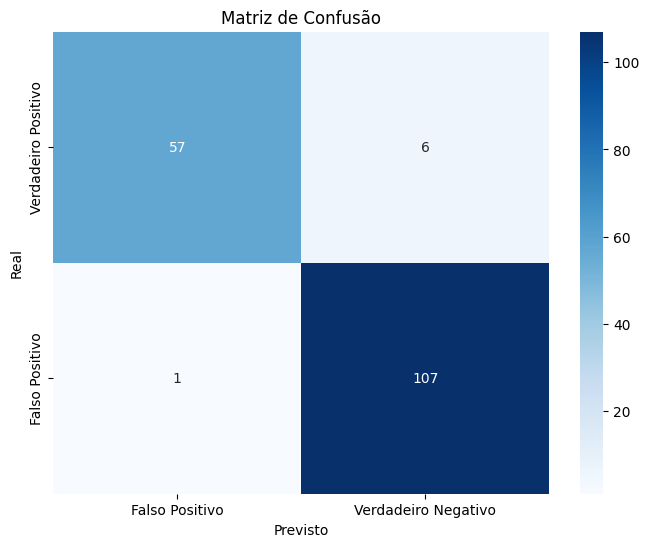

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Definir rótulos para os eixos x e y do gráfico
labelsX = ['Falso Positivo', 'Verdadeiro Negativo']
labelsY = ['Verdadeiro Positivo', 'Falso Positivo']

# Criar o gráfico de matriz de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labelsX, yticklabels=labelsY)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


Neste exemplo, utilizamos o algoritmo KNN para classificar tumores como malignos ou benignos com base nas características do conjunto de dados "Breast Cancer". O KNN é aplicado usando a classe KNeighborsClassifier da biblioteca scikit-learn, e avaliamos o desempenho do modelo usando a acurácia, o relatório de classificação e a matriz de confusão.

Lembre-se de ajustar o valor de "k" (n_neighbors) de acordo com os objetivos do seu projeto e explorar outras métricas de avaliação, conforme necessário. O KNN é uma excelente opção para classificação em diversos tipos de conjuntos de dados, incluindo problemas médicos como este exemplo de câncer de mama.

# SVM

SVM (Support Vector Machine) é um algoritmo de aprendizado de máquina que é amplamente usado para tarefas de classificação e regressão. Ele é conhecido por sua eficácia em problemas com alta dimensionalidade e é especialmente útil quando o número de características é maior do que o número de amostras disponíveis. O SVM é um algoritmo de aprendizado supervisionado, o que significa que requer um conjunto de dados rotulado para treinamento.

A ideia fundamental por trás do SVM é encontrar o hiperplano ótimo que melhor separa as amostras de diferentes classes no espaço de características. Um hiperplano é uma generalização de um plano em um espaço multidimensional, e em problemas de classificação binária, o SVM procura encontrar o hiperplano que maximize a margem entre as amostras das duas classes mais próximas a ele. Essas amostras são chamadas de vetores de suporte, daí o nome "Support Vector Machine".

Em um espaço bidimensional, o hiperplano é apenas uma linha reta que separa as duas classes. No entanto, em espaços de alta dimensionalidade, o hiperplano pode ser um plano ou uma superfície mais complexa. O SVM é capaz de lidar com dados não linearmente separáveis por meio do uso de funções de kernel, que mapeiam os dados para um espaço de características de maior dimensão, onde eles podem se tornar linearmente separáveis.

As principais características do SVM incluem:

- Eficiência em espaços de alta dimensionalidade: O SVM é capaz de lidar com conjuntos de dados com um grande número de características.

- Boa generalização: O SVM é menos propenso a overfitting (ajuste excessivo) em comparação com alguns outros algoritmos de aprendizado de máquina, especialmente quando o número de amostras é pequeno em relação ao número de características.

- Versatilidade: O SVM pode ser usado tanto para problemas de classificação binária quanto para problemas de classificação multiclasse.

- Sensibilidade à escala dos dados: É importante que os dados sejam normalizados antes de aplicar o SVM, pois ele pode ser sensível à escala das características.

Em resumo, o SVM é um algoritmo poderoso para problemas de classificação e regressão, especialmente quando lidamos com conjuntos de dados de alta dimensionalidade. Ele é amplamente utilizado em várias aplicações, como reconhecimento de padrões, bioinformática, processamento de imagens, entre outros.

## Exemplo de Classificação com SVM usando o Conjunto de Dados "Breast Cancer"
Etapa 1: Importando as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Etapa 2: Carregando e explorando o conjunto de dados
# Carregando o conjunto de dados "Breast Cancer"
data = load_breast_cancer()

# Criando um DataFrame com os dados
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Visualizando as primeiras linhas do DataFrame
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [ ]:
# Verificando informações sobre o conjunto de dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# Contagem de amostras de cada classe
print(df['target'].value_counts())

1    357
0    212
Name: target, dtype: int64


In [ ]:
# Etapa 3: Dividindo o conjunto de dados em treinamento e teste
# Separando os recursos (X) e os rótulos (y)
X = df.drop('target', axis=1)
y = df['target']

# Dividindo o conjunto de dados em treinamento e teste (70% treinamento, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Etapa 4: Aplicando o SVM
# Criando o objeto do modelo SVM com kernel RBF (Radial Basis Function)
svm = SVC(kernel='rbf')

# Treinando o modelo com o conjunto de treinamento
svm.fit(X_train, y_train)

SVC()

In [ ]:
#Etapa 5: Avaliando o desempenho do modelo
# Realizando previsões no conjunto de teste
y_pred = svm.predict(X_test)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')


Acurácia do modelo: 0.94


In [ ]:
# Exibindo o relatório de classificação
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.83      0.90        63
           1       0.91      1.00      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171



In [ ]:
# Exibindo a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[ 52  11]
 [  0 108]]


## Plot do gráfico

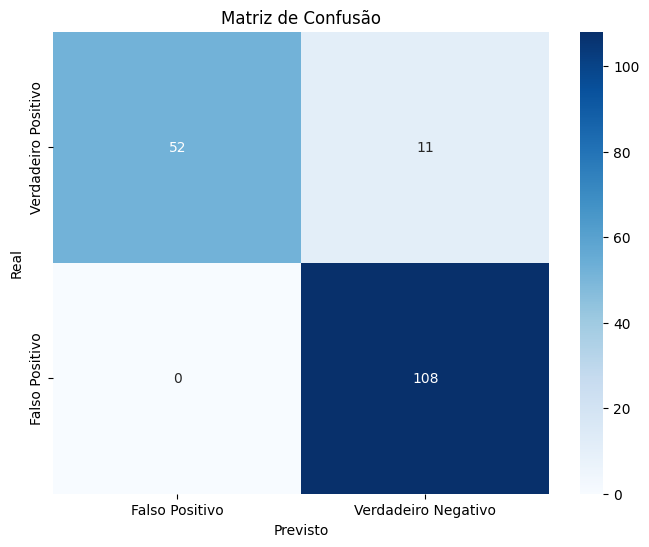

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Definir rótulos para os eixos x e y do gráfico
labelsX = ['Falso Positivo', 'Verdadeiro Negativo']
labelsY = ['Verdadeiro Positivo', 'Falso Positivo']

# Criar o gráfico de matriz de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labelsX, yticklabels=labelsY)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

Neste exemplo, usamos o algoritmo SVM para classificar tumores como malignos ou benignos com base nas características do conjunto de dados "Breast Cancer". O SVM é aplicado usando a classe SVC (Support Vector Classifier) da biblioteca scikit-learn, e avaliamos o desempenho do modelo usando a acurácia, o relatório de classificação e a matriz de confusão.

O SVM é uma excelente opção para classificação em diversos tipos de conjuntos de dados, incluindo problemas médicos como este exemplo de câncer de mama. Lembre-se de que o SVM pode ser sensível à escala das características, portanto, é uma boa prática normalizar os dados antes de aplicar o algoritmo para obter melhores resultados. Além disso, você pode experimentar diferentes kernels e ajustar seus hiperparâmetros para melhorar ainda mais o desempenho do modelo.

## Qual a diferença entre KNN e SVM?
KNN (K-Nearest Neighbors) e SVM (Support Vector Machine) são algoritmos de aprendizado de máquina usados principalmente para tarefas de classificação, mas eles possuem abordagens diferentes para realizar essa tarefa. Vamos destacar as principais diferenças entre eles:

1. Tipo de algoritmo:
   - KNN é um algoritmo de aprendizado baseado em instância (ou aprendizado preguiçoso), o que significa que ele armazena todo o conjunto de dados de treinamento em memória e não constrói explicitamente um modelo durante a fase de treinamento. Em vez disso, ele classifica novos pontos de dados com base nas classes das instâncias mais próximas a eles.
   - SVM é um algoritmo de aprendizado baseado em modelo (ou aprendizado ansioso), que busca encontrar um hiperplano ótimo que separe as amostras de diferentes classes no espaço de características. O hiperplano é construído durante a fase de treinamento e pode ser usado para classificar novos pontos de dados.

2. Abordagem de classificação:
   - KNN classifica um novo ponto de dados com base na maioria das classes dos "k" vizinhos mais próximos a ele. O valor de "k" é um hiperparâmetro que precisa ser escolhido pelo usuário.
   - SVM busca encontrar o hiperplano que maximize a margem entre as amostras das duas classes mais próximas a ele. Os pontos de dados que estão mais próximos ao hiperplano e influenciam na sua posição são chamados de vetores de suporte.

3. Complexidade computacional:
   - KNN pode ser computacionalmente mais pesado em problemas com grandes conjuntos de dados, pois ele precisa calcular a distância entre o novo ponto de dados e todos os pontos de dados no conjunto de treinamento para fazer a classificação.
   - SVM é mais eficiente em espaços de alta dimensionalidade, pois ele envolve apenas os vetores de suporte na determinação do hiperplano.

4. Sensibilidade à escala:
   - KNN pode ser sensível à escala das características, portanto, é uma boa prática normalizar os dados antes de aplicar o algoritmo para obter melhores resultados.
   - SVM também pode ser sensível à escala das características, mas normalmente é menos afetado do que KNN. Ainda assim, normalizar os dados é uma prática recomendada para SVM.

5. Tamanho do conjunto de treinamento:
   - KNN pode ser mais afetado por conjuntos de treinamento grandes, pois a busca pelos vizinhos mais próximos pode se tornar computacionalmente custosa.
   - SVM pode lidar melhor com conjuntos de treinamento grandes, especialmente quando o kernel RBF é usado.

Em resumo, ambas as técnicas são poderosas para problemas de classificação, mas têm abordagens diferentes para realizar a tarefa. KNN é um algoritmo simples e não requer um processo de treinamento explícito, enquanto SVM é um algoritmo baseado em modelo que busca encontrar um hiperplano que melhor separe as amostras das diferentes classes. A escolha entre KNN e SVM dependerá das características do problema específico, do tamanho do conjunto de dados e do conhecimento prévio sobre os dados. É sempre recomendado experimentar diferentes algoritmos e técnicas para encontrar a abordagem mais adequada para o seu problema.